In [1]:

import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from pathlib import Path
# from yamaha_crop0 import yamaha_crop
import matplotlib.pyplot as plt
import os
import argparse
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader, Dataset
from torch.optim import lr_scheduler
from PIL import Image
import numpy as np
import cv2
import glob
import copy

import image_folder as ImageFolder

/home/taki/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
data_dir = "/dataset/dataset/egg/egg_preference50_resize320"
#data_dir = "/dataset/dataset/egg/nomal_egg/nomal_egg"
paths = glob.glob(os.path.join(data_dir, "*.jpg"))

In [12]:
len(paths)

48

In [14]:
test_transform = torchvision.transforms.Compose([
                            #transforms.RandomHorizontalFlip(p=0.5),
                            #transforms.RandomVerticalFlip(p=0.5),
                            #transforms.RandomRotation(degrees=360),
                            transforms.ToTensor(),
                            transforms.Grayscale(num_output_channels=1),
                            transforms.Resize((256, 256)),
                            #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

dataset = ImageFolder.ImageFolder(img_dir=data_dir, transform=test_transform)

test_loader = torch.utils.data.DataLoader(dataset, batch_size=50, shuffle=False, num_workers=4, drop_last=True)

In [15]:
len(test_loader)

1

/home/taki/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/taki/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


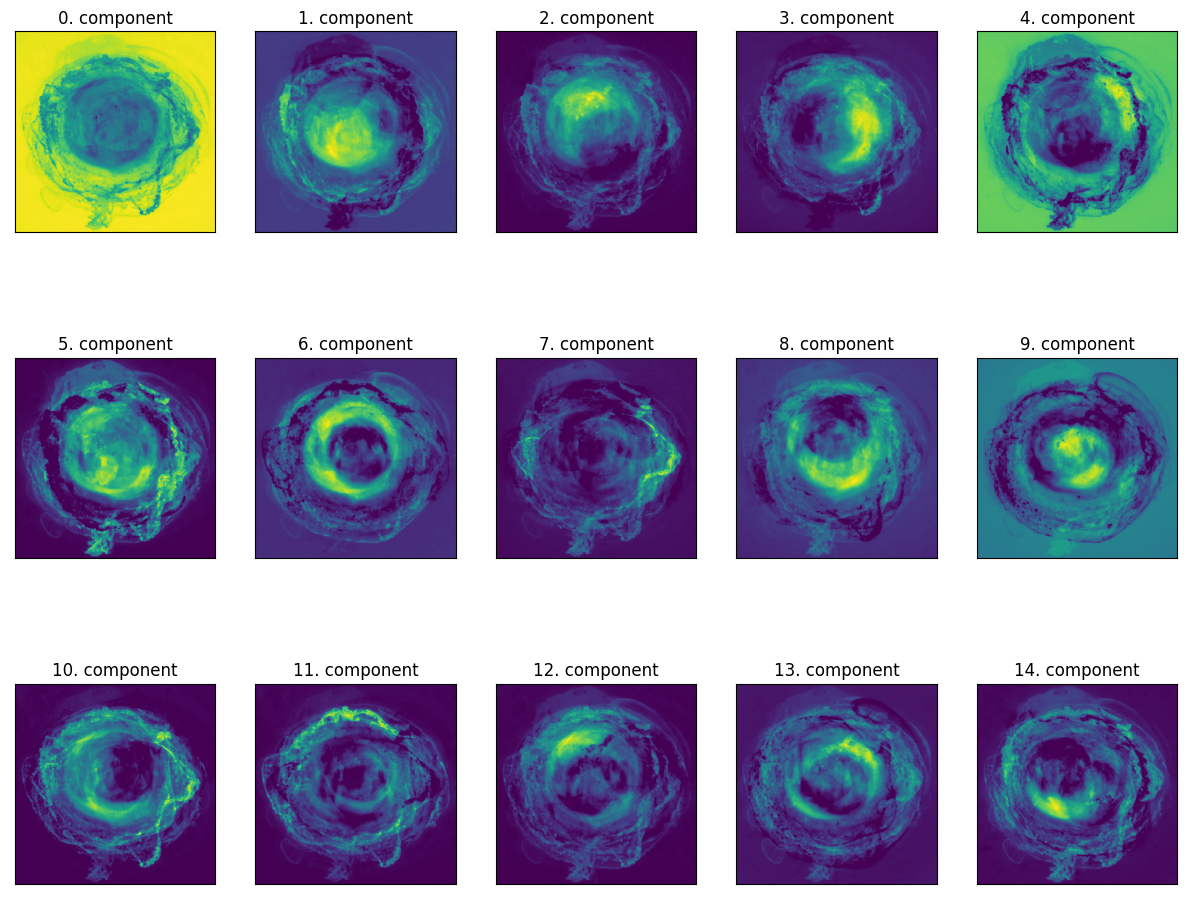

In [16]:
for i, x in enumerate(test_loader):
    x = x.reshape(-1, 256*256)

x = 0.5 * (x + 1)
x = x.clamp(0, 1)
x.numpy()

nmf = NMF(n_components=15, random_state=0)
nmf.fit(x)


fix, axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={"xticks":(), "yticks":()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(256,256))
    ax.set_title("{}. component".format(i))

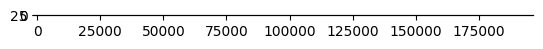

In [112]:
plt.imshow(x)

In [120]:
print(nmf.components_.min())
print(nmf.components_.max())

0.0
1.0149613594607445


/home/taki/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/taki/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


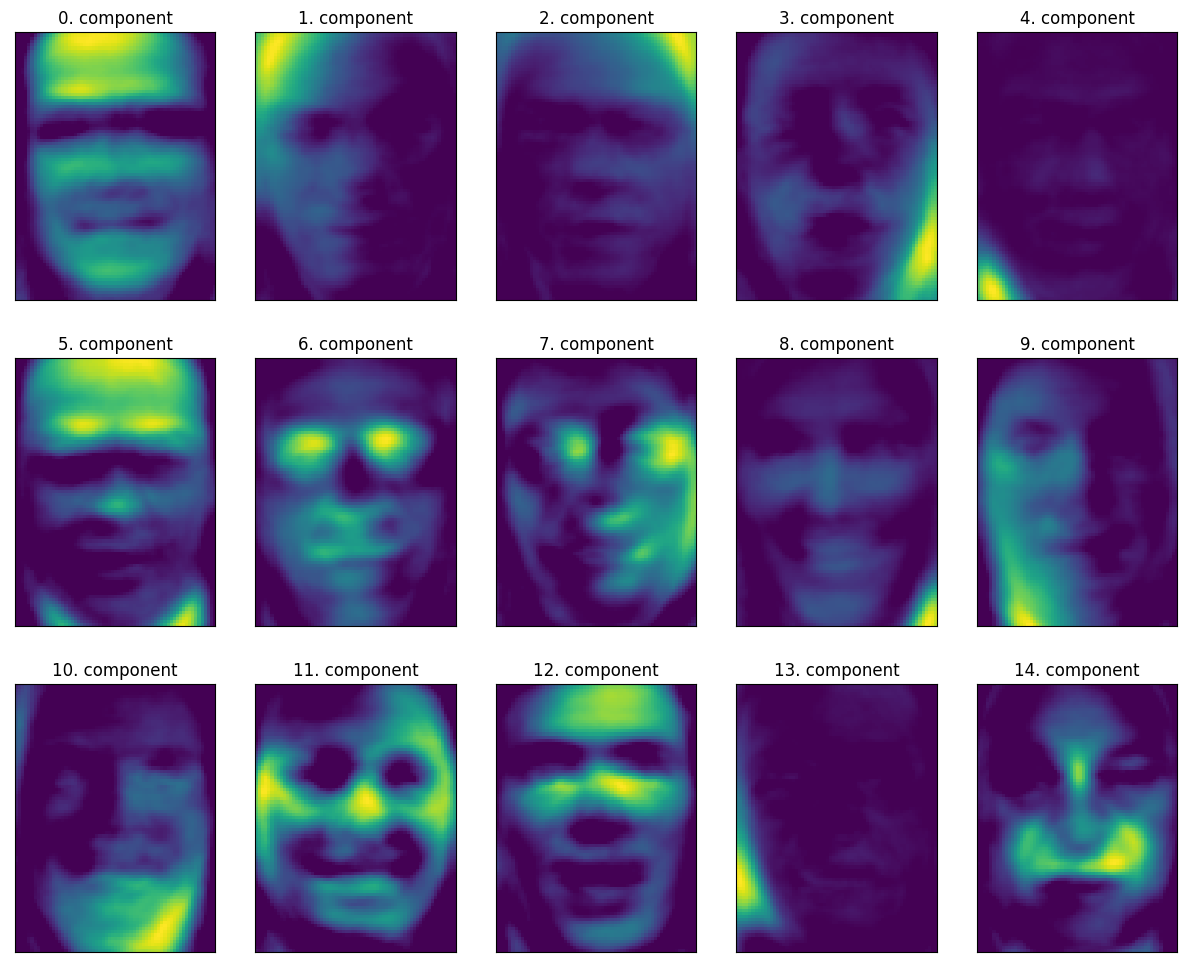

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
# reshapeする時の画像解像度に応じた行列
image_shape = people.images[0].shape

# 1人物50枚までにする為の処理。使用するindexにTrueを立てる、
# targetの数分のarrayを用意
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    # 各ターゲットの50件までTrueを立てる whereで条件に合うpeopleのindexを取得できる
    mask[np.where(people.target == target)[0][:50]] = 1

# Trueのデータのみ訓練、検証データに使用する
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)

# NMF分解の実行 15個の特徴量に分解
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={"xticks":(), "yticks":()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

In [90]:
people.images.shape

(3023, 87, 65)

In [14]:
X_people.shape

(2063, 5655)

In [101]:
people.data

array([[ 57.      ,  60.333332,  78.      , ...,  17.333334,  16.666666,
         22.666666],
       [ 66.666664,  80.666664,  88.666664, ...,   8.666667,   8.333333,
          9.333333],
       [ 18.666666,  14.333333,  15.      , ...,  22.666666,  22.666666,
         25.666666],
       ...,
       [ 77.333336,  90.333336,  93.333336, ..., 233.66667 , 234.33333 ,
        230.66667 ],
       [ 87.666664,  71.666664,  63.333332, ...,  96.      ,  92.333336,
         96.333336],
       [ 91.      ,  90.666664,  94.666664, ...,  40.333332,  42.333332,
         42.333332]], dtype=float32)

In [95]:
X_train.shape

(1547, 5655)